In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import LinearNDInterpolator

## Generate interpolator

In [3]:
# Load data and prepare for plotting
r_list = np.tensordot(np.loadtxt("data/radii_list1.txt"), np.ones(3), axes = 0)
mass_list = np.tensordot(np.tensordot(np.loadtxt("data/mass_list1.txt"), np.ones(len(r_list[0, :])), axes=0), np.ones(3), axes = 0)
m_loss_list = np.load("data/m_loss_list1.npy")
m_dot_list = np.loadtxt("data/m_dot_list1.txt")

In [3]:
print(mass_list.shape)
print(r_list.shape)
print(m_loss_list.shape)

(15, 16, 3)
(15, 16, 3)
(15, 16, 3)


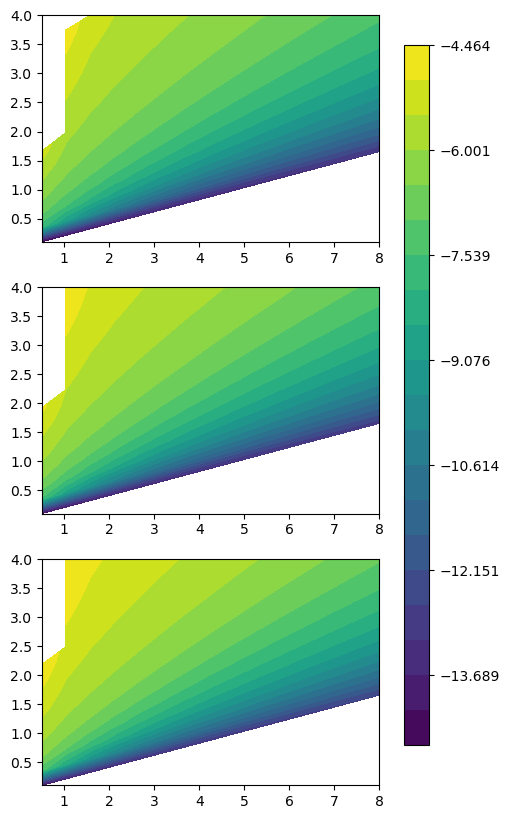

In [4]:
vmin = np.nanmin(np.log10(m_loss_list))
vmax = np.nanmax(np.log10(m_loss_list))
nlevels = 20
levels = np.linspace(vmin, vmax, nlevels+1)

fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(5, 10))
for i, ax in enumerate(axes.flat):
    im = ax.contourf(mass_list[:, :, i], r_list[:, :, i], np.log10(m_loss_list[:, :, i]), levels=levels)
    #plt.scatter(mass_list[:, :, i], r_list[:, :, i])
    #plt.contour(mass_list, r_list, r_I_list[:, :, 0], colors="black")

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
fig.colorbar(im, cax=cbar_ax)

In [5]:
def repack(mass_list, r_list, m_dot_list):
    points = []
    for i in range(len(mass_list)):
        for j in range(len(r_list[0, :])):
            for k in range(len(m_dot_list)):
                points.append([mass_list[i, j, k], r_list[i, j, k], m_dot_list[k]])
    return np.array(points, dtype=object)

In [6]:
points = repack(mass_list, r_list, m_dot_list)
print(points.shape)
tot = len(mass_list) * len(r_list[0, :]) * len(m_dot_list)
print(tot)
result = m_loss_list.reshape(tot)
print(result.shape)

(720, 3)
720
(720,)


In [7]:
interp = LinearNDInterpolator(points, np.log10(result))

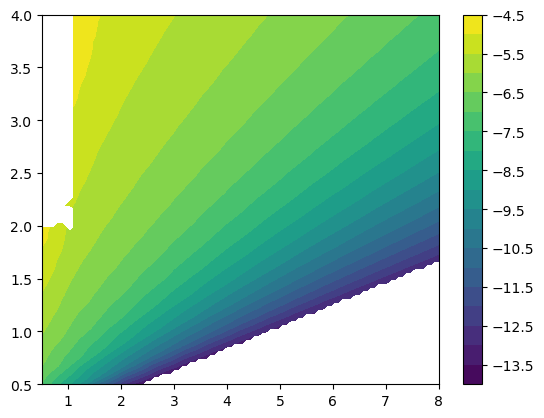

In [8]:
x = np.linspace(0.5, 8, 100)
y = np.linspace(0.5, 4, 100)
X, Y = np.meshgrid(x, y)

plt.contourf(X, Y, interp(X, Y, 0.5), 20)
plt.colorbar()

In [9]:
np.save("interpolator_mass_loss", interp)